<a href="https://colab.research.google.com/github/goransh02/Meta-Learning-SOC-2021-IITB/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#uploaded image using this
from google.colab import files
from IPython.display import Image
uploaded=files.upload()

Saving 1.jpeg to 1.jpeg


In [46]:
from __future__ import print_function
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster
#change the num clusters to get different averages from the image
NUM_CLUSTERS = 1000

print('reading image')
im = Image.open('1.jpeg')
im = im.resize((150, 150))  
ar = np.asarray(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

print('finding clusters')
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
print('cluster centres:\n', codes)

vecs, dist = scipy.cluster.vq.vq(ar, codes)        
counts, bins = scipy.histogram(vecs, len(codes))   

index_max = scipy.argmax(counts)                   
peak = codes[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most frequent is %s (#%s)' % (peak, colour))
import imageio
c = ar.copy()
for i, code in enumerate(codes):
    c[scipy.r_[scipy.where(vecs==i)],:] = code
imageio.imwrite('clusters.png', c.reshape(*shape).astype(np.uint8))
print('saved clustered image')


reading image
finding clusters


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.product is deprecated and will be removed in SciPy 2.0.0, use numpy.product instead


cluster centres:
 [[190.42105263 225.73684211 131.52631579]
 [ 41.65957447  14.19148936   3.57446809]
 [ 45.5         25.38461538   6.5       ]
 ...
 [235.3125     247.8125     214.25      ]
 [193.03389831 179.98305085  91.6440678 ]
 [ 46.86666667 147.6        140.83333333]]
most frequent is [ 32.112 153.992 190.872] (#2099be)
saved clustered image


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead


In [44]:
from google.colab import files
from IPython.display import Image
uploaded=files.upload()


Saving Screenshot 2021-04-11 180003.jpg to Screenshot 2021-04-11 180003.jpg


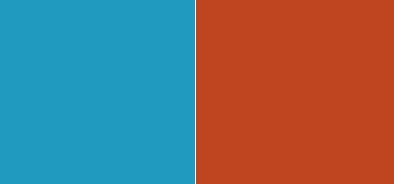

In [45]:
Image('Screenshot 2021-04-11 180003.jpg')